<a href="https://colab.research.google.com/github/emily0622/Python-Projects/blob/main/421Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

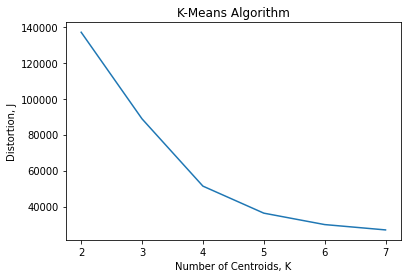

In [ ]:
import sklearn
import sklearn.datasets
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

dictionary_dataset = sklearn.datasets.load_breast_cancer()
dataset = dictionary_dataset['data']

def k_means(dataset, k):
  
  # Initialization of cluster centroids as k samples from dataset
  centroids = []
  for _ in range(k):
    centroids.append(dataset[np.random.choice(len(dataset))])
  
  length = len(centroids[0])

  # c is an array indicating the index of cluster to which each data sample belongs
  c = np.zeros(len(dataset))
  acceptable = False
  counter = 0


  while not acceptable:
    counter += 1
    # Initialize each value in array to zero before summing values of each element in cluster
    update_position = np.zeros(np.shape(centroids))

    # To update closest centroid to each data point and update centroid position
    for i in range(len(dataset)):
      diff = []
      for centroid in centroids:
        diff.append(np.sum(np.power(np.diff([dataset[i], centroid], axis=0), 2)))
      
      # To assign index (of centroid) to each element of dataset
      c[i] = np.argmin(diff)

      # To calculate average position of cluster
      update_position[int(c[i])] = np.add(update_position[int(c[i])], dataset[i])
      
    
    for i in range(k):
      update_position[i] /= np.count_nonzero(c == i)
    if (np.array_equal(centroids, update_position)):
      acceptable = True
    else:
      centroids = update_position
    
  return (centroids, c)

(mu_2, c_2) = k_means(dataset, 2)
(mu_3, c_3) = k_means(dataset, 3)
(mu_4, c_4) = k_means(dataset, 4)
(mu_5, c_5) = k_means(dataset, 5)
(mu_6, c_6) = k_means(dataset, 6)
(mu_7, c_7) = k_means(dataset, 7)


def get_distortion(mu, c, dataset):
  diff = []
  for i in range(len(dataset)):
    diff.append(np.sum(np.power(np.diff([dataset[i], mu[int(c[i])]], axis=0), 2)))
  return (np.sum(diff)/len(dataset))



distortions = []
distortions.append(get_distortion(mu_2,c_2,dataset))
distortions.append(get_distortion(mu_3,c_3,dataset))
distortions.append(get_distortion(mu_4,c_4,dataset))
distortions.append(get_distortion(mu_5,c_5,dataset))
distortions.append(get_distortion(mu_6,c_6,dataset))
distortions.append(get_distortion(mu_7,c_7,dataset))

plt.plot(np.arange(2,7+1),distortions)
plt.title('K-Means Algorithm')
plt.xlabel("Number of Centroids, K")
plt.ylabel("Distortion, J")

print("",end="")